In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt


def matrix_minor(A, i, j):
    return np.delete(np.delete(A, i, axis=0), j, axis=1)

def inverse(A):
    result = np.zeros(A.shape)
    det_A = np.linalg.det(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            tmp = matrix_minor(A, i, j)
            if (i + j) % 2 == 1:
                result[i, j] = -1 * np.linalg.det(tmp) / det_A
            else:
                result[i, j] = 1 * np.linalg.det(tmp) / det_A
    return result.T

In [6]:
EPS = 1e-4
TIME = []
SIZE = []
SOL_REPEAT = 3
MAX_POWER = 8

for power in range(1, MAX_POWER):
    n = 2**power
    SIZE.append(n)
    print("Current matrix size: ", str(n))
    b = np.random.rand(n)
    mat = np.random.rand(n, n)
    
    while np.linalg.det(mat) < EPS:
        print("Recreate matrix...")
        mat = np.random.rand(n, n)

    mean_time = 0
    for i in range(SOL_REPEAT):
        time_from = time.time()
        mat_1 = inverse(mat)
#         print(np.linalg.solve(mat, b))
#         print(np.matmul(mat_1, b))
        np.matmul(mat_1, b)
        mean_time += time.time() - time_from
    
    TIME.append(mean_time / SOL_REPEAT)

Current matrix size:  2
Current matrix size:  4
Current matrix size:  8
Current matrix size:  16
Recreate matrix...
Current matrix size:  32
Recreate matrix...
Current matrix size:  64
Recreate matrix...
Current matrix size:  128


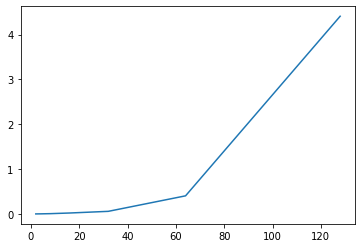

In [7]:
plt.plot(SIZE, TIME)